## Tony Nunn <br>
## ME555 Robot Learning <br>
## Visualizations

In [1]:
#imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.io
import os

#### Setting Up

In [14]:
#Figure out the project root automatically (up to EMG_Motion/)
PROJECT_ROOT = Path(os.getcwd()).resolve()
while PROJECT_ROOT.name != "EMG_Motion" and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

# Add the src directory to the Python path
SRC_PATH = PROJECT_ROOT / "src"
if str(SRC_PATH) not in sys.path:
    sys.path.append(str(SRC_PATH))

print("Project root:", PROJECT_ROOT)
print("Added to sys.path:", SRC_PATH)

#Setting up Figures path
FIG_DIR = Path(PROJECT_ROOT) / "figures"
FIG_DIR.mkdir(exist_ok=True)

Project root: C:\Projects\EMG_Motion
Added to sys.path: C:\Projects\EMG_Motion\src


### EMG vs. Stimulus Labels

In [23]:
from data_loader import LoadAndProcess


PROJECT_ROOT = Path(os.getcwd()).resolve().parents[0]
sys.path.append(str(PROJECT_ROOT / "src"))


DATA_PATH = PROJECT_ROOT / "data" / "ninapro" / "DB1" / "S1"
SINGLE_FILE = DATA_PATH / "S1_A1_E3.mat"  # E2 = grasping primitives

WINDOW_SIZE = 50
OVERLAP_SIZE = 25

# Use your existing loader to get features and labels
X, Y = LoadAndProcess(str(SINGLE_FILE), WINDOW_SIZE, OVERLAP_SIZE)

print(f"Loaded Features: {X.shape}")
print(f"Loaded Labels: {Y.shape}")
print("Unique gesture labels:", np.unique(Y))


Processing file: S1_A1_E3.mat...

Successfully processed 1 file(s).
Final Dataset Shape: Features (X)=(9098, 10), Labels (y)=(9098,)
Loaded Features: (9098, 10)
Loaded Labels: (9098,)
Unique gesture labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


#### MAV Features vs. Time

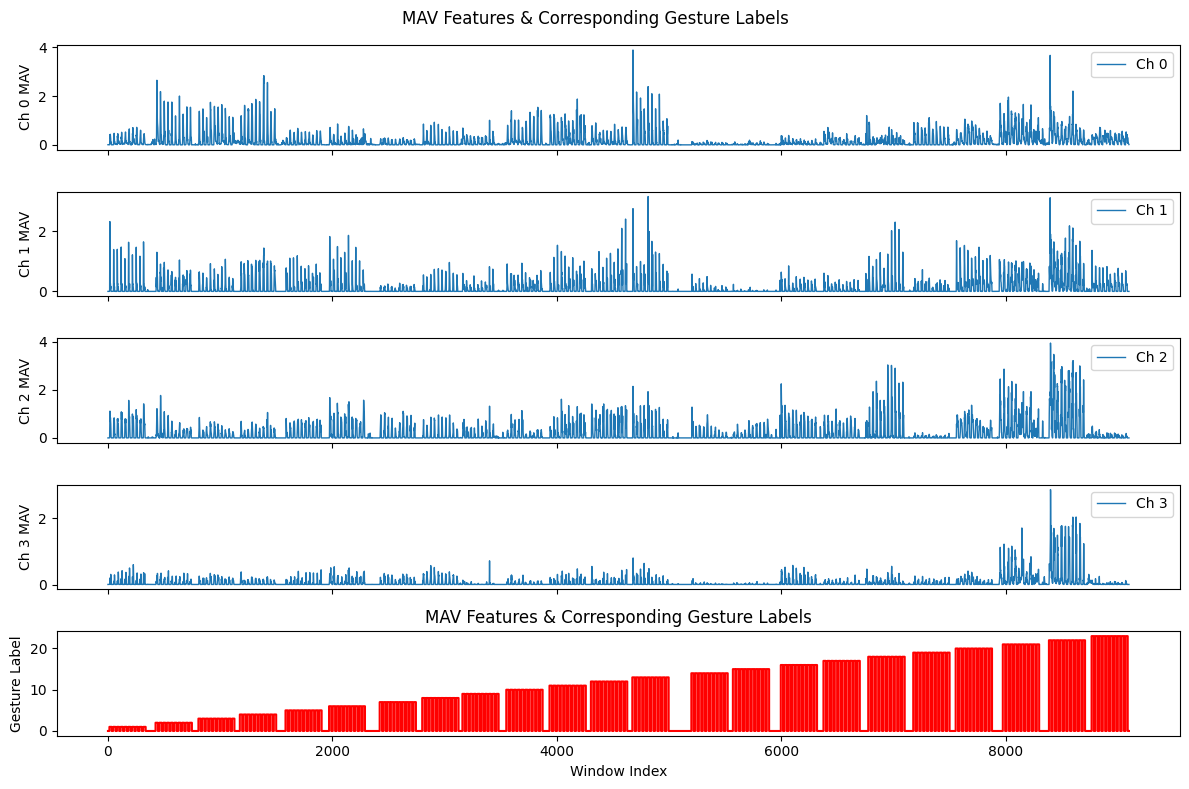

In [24]:
selectChannels = [0, 1, 2, 3]  # pick a few EMG channels

fig, axs = plt.subplots(len(selectChannels) + 1, 1, figsize=(12, 8), sharex=True)

fig.suptitle("MAV Features & Corresponding Gesture Labels")

# Plot MAV features per channel
for i, ch in enumerate(selectChannels):
    axs[i].plot(X[:, ch], label=f'Ch {ch}', linewidth=1)
    axs[i].set_ylabel(f'Ch {ch} MAV')
    axs[i].legend(loc='upper right')

# Plot gesture labels as red step plot
axs[-1].step(np.arange(len(Y)), Y, where='post', color='red')
axs[-1].set_ylabel("Gesture Label")
axs[-1].set_xlabel("Window Index")
axs[-1].set_title("MAV Features & Corresponding Gesture Labels")

plt.tight_layout()
plt.savefig(FIG_DIR / "mavFeatures_E3.png", dpi=300, bbox_inches="tight")

#### Compare Average Activation per Gesture

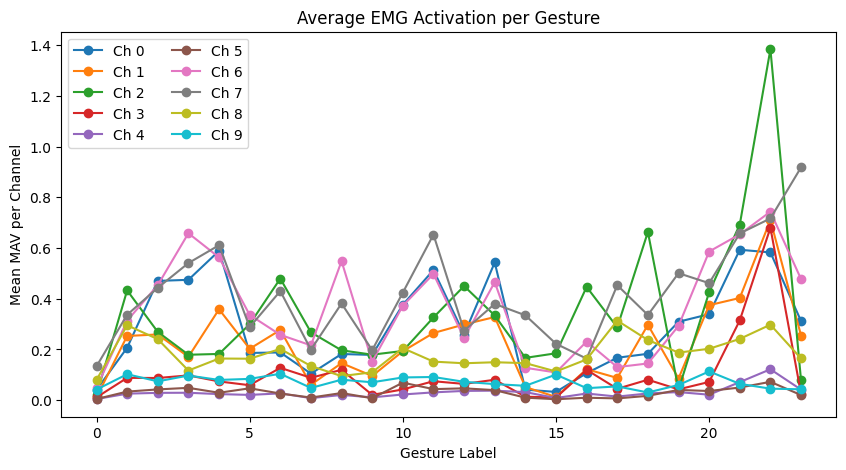

In [25]:
unique_labels = np.unique(Y)
mean_mav_per_label = []

for lbl in unique_labels:
    mean_mav_per_label.append(X[Y == lbl].mean(axis=0))

mean_mav_per_label = np.array(mean_mav_per_label)

plt.figure(figsize=(10, 5))
for ch in range(X.shape[1]):
    plt.plot(unique_labels, mean_mav_per_label[:, ch], marker='o', label=f'Ch {ch}')
plt.xlabel("Gesture Label")
plt.ylabel("Mean MAV per Channel")
plt.title("Average EMG Activation per Gesture")
plt.legend(ncol=2)
plt.savefig(FIG_DIR / "avgEMGperGesture_E3.png", dpi=300, bbox_inches="tight")

#### Visualize Raw EMG and Labels

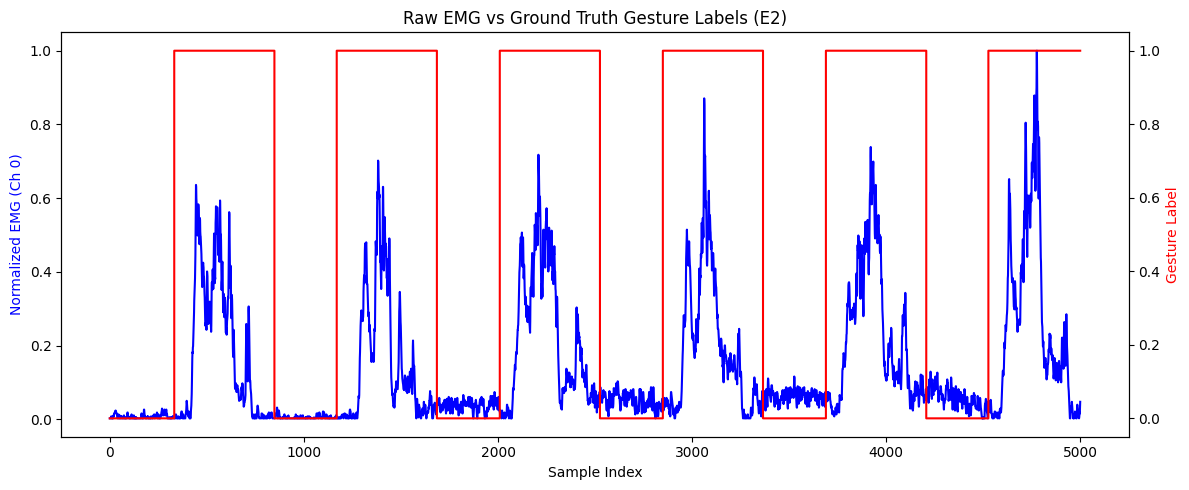

In [ ]:
import scipy.io

mat = scipy.io.loadmat(SINGLE_FILE)
emg = mat["emg"]
stimulus = mat["stimulus"].flatten()

# Plot a subset for clarity
start, end = 0, 5000
time = np.arange(start, end)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(time, emg[start:end, 0] / np.max(np.abs(emg[start:end, 0])), color='blue', label='EMG (Ch 0)')
ax1.set_ylabel("Normalized EMG (Ch 0)", color='blue')
ax1.set_xlabel("Sample Index")

ax2 = ax1.twinx()
ax2.step(time, stimulus[start:end], where='post', color='red', label='Gesture Label')
ax2.set_ylabel("Gesture Label", color='red')

plt.title("Raw EMG vs Ground Truth Gesture Labels (E2)")
plt.tight_layout()
plt.savefig(FIG_DIR / "rawEMG+labels_E1.png", dpi=300, bbox_inches="tight")

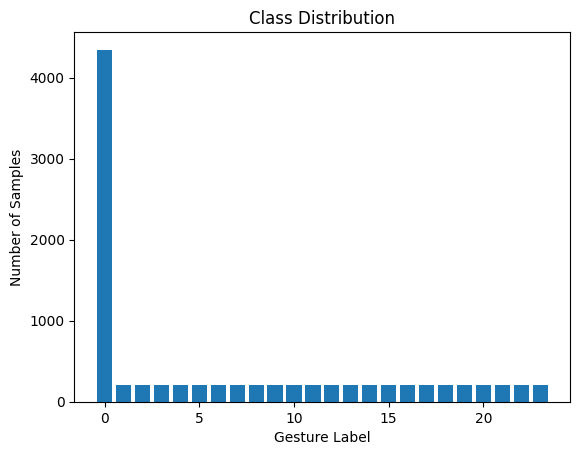

In [26]:
unique, counts = np.unique(Y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Gesture Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.savefig(FIG_DIR / "class_distribution_E3.png", dpi=300, bbox_inches="tight")